# Detección y Reconocimiento de Placas Vehiculares con YOLOv8n y OCR

Este notebook entrena un modelo YOLOv11n para detectar placas vehiculares, realiza OCR sobre las predicciones y visualiza los resultados, incluyendo métricas, matriz de confusión, inferencias y collage de resultados.

## Outline
1. Instalación de dependencias
2. Configuración del entorno y rutas
3. Visualización de ejemplos del dataset
4. Entrenamiento del modelo YOLO11n para detección de placas
5. Evaluación: métricas de validación y test
6. Matriz de confusión de detección
7. Inferencia y visualización de predicciones
8. OCR: extracción de texto de las placas detectadas
9. Collage de inferencias con predicciones y texto OCR

In [ ]:
# dependencias
%pip install ultralytics opencv-python matplotlib seaborn pytesseract

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 34.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 4.6 MB/s eta 0:00:000:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.3 MB/s eta 0:00:000:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 2.5 MB/s eta 0:00:000:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 6.2 MB/s eta 0:00:000:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 13.5 MB/s eta 0:00:00:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 8.2 MB/s eta 0:00:000:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 82.9 MB/s eta 0:00:00:00:0100:01
  Attempting uninstall: nvidia-nvjitlink-cu12
    Found existing installation: nvidia-nvjitlink-cu12 12.9.41
    Uninstalling nvidia-nvjitlink-cu12-12.9.41:
      Successfully uninstalled nvidia-nvjitlink-cu12-12.9.41
  Attempting uninstall: nvidia-curand-cu12
    Found existing ins

In [ ]:
# Configuración del entorno y rutas
import os
from ultralytics import YOLO
import cv2
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pytesseract
from glob import glob

# Rutas del dataset
DATA_YAML = "/kaggle/input/dataset-rody/data.yaml"  # Debe estar en el mismo directorio o ajusta la ruta
TRAIN_DIR = "/kaggle/input/dataset-rody/train/images"
VAL_DIR = "/kaggle/input/dataset-rody/valid/images"
TEST_DIR = "/kaggle/input/dataset-rody/test/images"

# Clases
CLASSES = ['License_Plate']

Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/root/.config/Ultralytics/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.


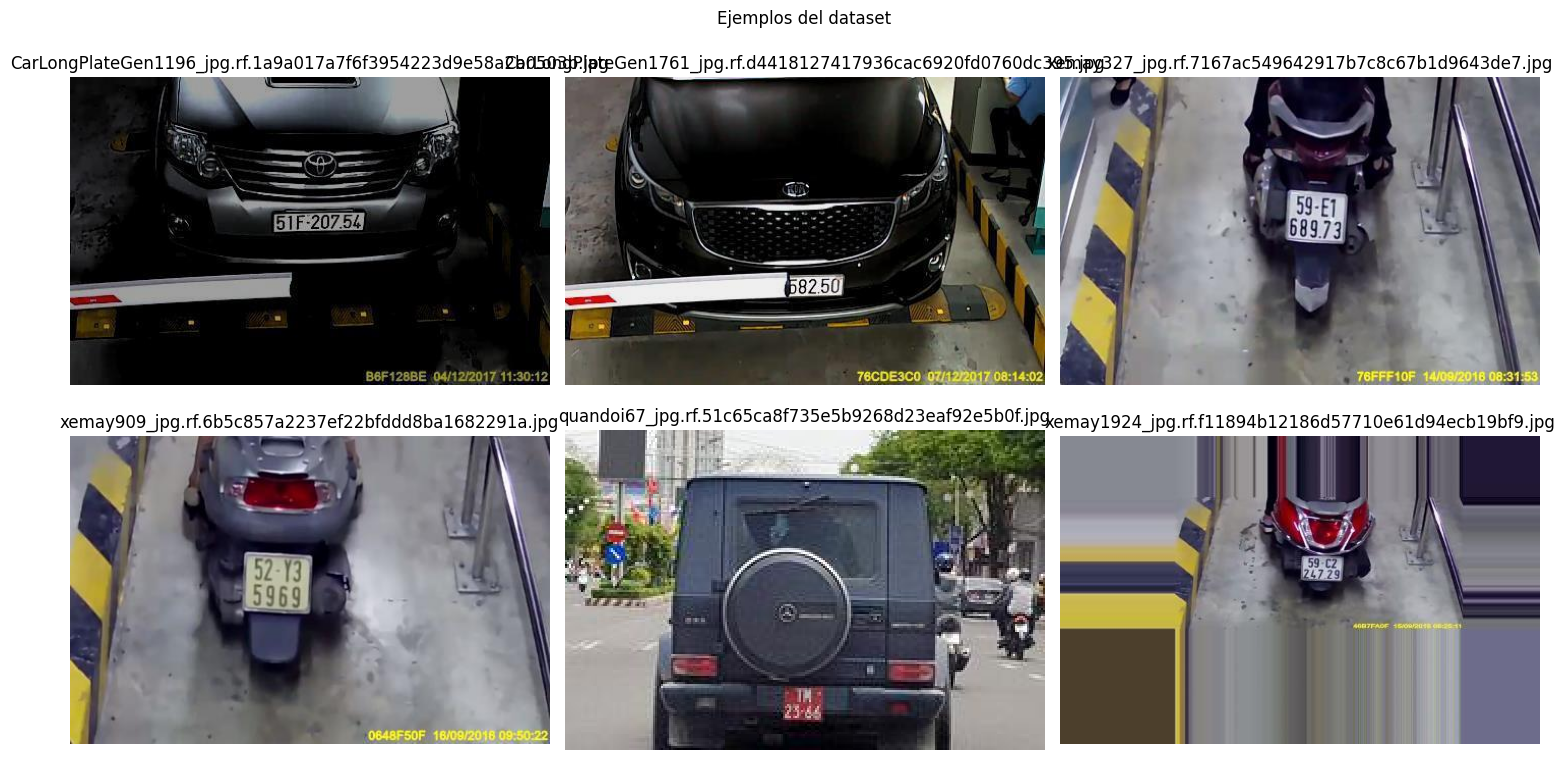

Mostrando 6 imágenes de la carpeta: /kaggle/input/dataset-rody/train/images


In [ ]:
# Visualización de ejemplos del dataset

def show_images_grid(image_dir, n=6):
    images = glob(os.path.join(image_dir, "*.jpg")) + glob(os.path.join(image_dir, "*.png"))
    n = min(n, len(images))
    cols = 3
    rows = (n + cols - 1) // cols
    plt.figure(figsize=(5*cols, 4*rows))
    for i, img_path in enumerate(images[:n]):
        img = cv2.imread(img_path)
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
        plt.subplot(rows, cols, i+1)
        plt.imshow(img)
        plt.axis('off')
        plt.title(os.path.basename(img_path))
    plt.suptitle("Ejemplos del dataset")
    plt.tight_layout()
    plt.show()
    print(f"Mostrando {n} imágenes de la carpeta: {image_dir}")

show_images_grid(TRAIN_DIR)

In [ ]:
# Entrenamiento del modelo YOLO11n
model = YOLO('yolo11n.pt')
results = model.train(data=DATA_YAML, epochs=30, imgsz=640, batch=16, project='runs', name='placas_yolo11n')

100%|██████████| 5.35M/5.35M [00:00<00:00, 180MB/s]


Ultralytics 8.3.158 🚀 Python-3.11.11 torch-2.6.0+cu124 CUDA:0 (Tesla P100-PCIE-16GB, 16269MiB)
engine/trainer: agnostic_nms=False, amp=True, augment=False, auto_augment=randaugment, batch=16, bgr=0.0, box=7.5, cache=False, cfg=None, classes=None, close_mosaic=10, cls=0.5, conf=None, copy_paste=0.0, copy_paste_mode=flip, cos_lr=False, cutmix=0.0, data=/kaggle/input/dataset-rody/data.yaml, degrees=0.0, deterministic=True, device=None, dfl=1.5, dnn=False, dropout=0.0, dynamic=False, embed=None, epochs=30, erasing=0.4, exist_ok=False, fliplr=0.5, flipud=0.0, format=torchscript, fraction=1.0, freeze=None, half=False, hsv_h=0.015, hsv_s=0.7, hsv_v=0.4, imgsz=640, int8=False, iou=0.7, keras=False, kobj=1.0, line_width=None, lr0=0.01, lrf=0.01, mask_ratio=4, max_det=300, mixup=0.0, mode=train, model=yolo11n.pt, momentum=0.937, mosaic=1.0, multi_scale=False, name=placas_yolov8n, nbs=64, nms=False, opset=None, optimize=False, optimizer=auto, overlap_mask=True, patience=100, perspective=0.0, plot

100%|██████████| 755k/755k [00:00<00:00, 49.0MB/s]


Overriding model.yaml nc=80 with nc=1

                   from  n    params  module                                       arguments                     
  0                  -1  1       464  ultralytics.nn.modules.conv.Conv             [3, 16, 3, 2]                 
  1                  -1  1      4672  ultralytics.nn.modules.conv.Conv             [16, 32, 3, 2]                
  2                  -1  1      6640  ultralytics.nn.modules.block.C3k2            [32, 64, 1, False, 0.25]      
  3                  -1  1     36992  ultralytics.nn.modules.conv.Conv             [64, 64, 3, 2]                
  4                  -1  1     26080  ultralytics.nn.modules.block.C3k2            [64, 128, 1, False, 0.25]     
  5                  -1  1    147712  ultralytics.nn.modules.conv.Conv             [128, 128, 3, 2]              
  6                  -1  1     87040  ultralytics.nn.modules.block.C3k2            [128, 128, 1, True]           
  7                  -1  1    295424  ultralytics

train: Scanning /kaggle/input/dataset-rody/train/labels... 7057 images, 5 backgrounds, 0 corrupt: 100%|██████████| 7057/7057 [00:20<00:00, 352.64it/s]


WARNING ⚠️ train: Cache directory /kaggle/input/dataset-rody/train is not writeable, cache not saved.
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))
val: Fast image access ✅ (ping: 0.0±0.0 ms, read: 8.5±3.2 MB/s, size: 20.8 KB)


val: Scanning /kaggle/input/dataset-rody/valid/labels... 2048 images, 3 backgrounds, 0 corrupt: 100%|██████████| 2048/2048 [00:05<00:00, 351.91it/s]


WARNING ⚠️ val: Cache directory /kaggle/input/dataset-rody/valid is not writeable, cache not saved.
Plotting labels to runs/placas_yolov8n/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.002, momentum=0.9) with parameter groups 81 weight(decay=0.0), 88 weight(decay=0.0005), 87 bias(decay=0.0)
Image sizes 640 train, 640 val
Using 4 dataloader workers
Logging results to runs/placas_yolov8n
Starting training for 30 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       1/30      2.41G      1.263      1.573      1.146          1        640: 100%|██████████| 442/442 [01:39<00:00,  4.44it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 64/64 [00:13<00:00,  4.89it/s]


                   all       2048       2195      0.904      0.822      0.887      0.516

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       2/30      3.24G      1.267     0.8805      1.158          1        640: 100%|██████████| 442/442 [01:34<00:00,  4.68it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 64/64 [00:11<00:00,  5.70it/s]

                   all       2048       2195       0.91      0.816      0.887      0.541



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       3/30      3.26G      1.268     0.7963       1.16          1        640: 100%|██████████| 442/442 [01:33<00:00,  4.72it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 64/64 [00:11<00:00,  5.81it/s]

                   all       2048       2195      0.902      0.855      0.889      0.564



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       4/30      3.27G      1.239     0.7419      1.139          0        640: 100%|██████████| 442/442 [01:33<00:00,  4.74it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 64/64 [00:11<00:00,  5.49it/s]

                   all       2048       2195      0.939      0.879      0.923      0.605



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       5/30      3.29G      1.223     0.7006      1.133          2        640: 100%|██████████| 442/442 [01:33<00:00,  4.72it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 64/64 [00:11<00:00,  5.65it/s]

                   all       2048       2195      0.949      0.869      0.924       0.62



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       6/30       3.3G      1.209     0.6757       1.12          4        640: 100%|██████████| 442/442 [01:32<00:00,  4.76it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 64/64 [00:11<00:00,  5.77it/s]

                   all       2048       2195       0.97      0.887      0.934      0.622



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       7/30      3.32G      1.189     0.6539      1.113          3        640: 100%|██████████| 442/442 [01:32<00:00,  4.78it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 64/64 [00:11<00:00,  5.78it/s]

                   all       2048       2195      0.966      0.912      0.949      0.636



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       8/30      3.33G      1.178      0.633      1.109          3        640: 100%|██████████| 442/442 [01:32<00:00,  4.79it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 64/64 [00:11<00:00,  5.62it/s]

                   all       2048       2195      0.946      0.921      0.951      0.646



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       9/30      3.35G      1.168     0.6208      1.097          1        640: 100%|██████████| 442/442 [01:32<00:00,  4.78it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 64/64 [00:11<00:00,  5.77it/s]

                   all       2048       2195      0.974      0.915      0.957      0.655



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      10/30      3.36G      1.152     0.6026      1.089          1        640: 100%|██████████| 442/442 [01:32<00:00,  4.78it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 64/64 [00:10<00:00,  5.90it/s]

                   all       2048       2195      0.967      0.913      0.948      0.642



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      11/30      3.38G      1.143     0.5862      1.087          4        640: 100%|██████████| 442/442 [01:32<00:00,  4.79it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 64/64 [00:10<00:00,  5.86it/s]

                   all       2048       2195      0.973      0.919      0.958      0.664



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      12/30      3.39G      1.139     0.5793      1.084          2        640: 100%|██████████| 442/442 [01:32<00:00,  4.78it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 64/64 [00:10<00:00,  5.86it/s]

                   all       2048       2195      0.984      0.914       0.96       0.66



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      13/30      3.41G      1.121     0.5617      1.076          4        640: 100%|██████████| 442/442 [01:32<00:00,  4.79it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 64/64 [00:10<00:00,  5.84it/s]

                   all       2048       2195      0.972      0.927      0.967      0.673



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      14/30      3.42G      1.112       0.55      1.069          2        640: 100%|██████████| 442/442 [01:32<00:00,  4.77it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 64/64 [00:11<00:00,  5.75it/s]

                   all       2048       2195      0.981      0.925      0.963      0.658



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      15/30      3.44G      1.116     0.5412      1.073          1        640: 100%|██████████| 442/442 [01:32<00:00,  4.76it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 64/64 [00:11<00:00,  5.67it/s]

                   all       2048       2195      0.976      0.933      0.963      0.672



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      16/30      3.45G      1.106      0.538      1.067          1        640: 100%|██████████| 442/442 [01:33<00:00,  4.73it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 64/64 [00:10<00:00,  5.84it/s]

                   all       2048       2195      0.973       0.93      0.963      0.663



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      17/30      3.46G      1.094     0.5297      1.058          3        640: 100%|██████████| 442/442 [01:32<00:00,  4.78it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 64/64 [00:11<00:00,  5.77it/s]

                   all       2048       2195      0.981      0.929      0.965      0.674



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      18/30      3.48G      1.091     0.5241      1.057          2        640: 100%|██████████| 442/442 [01:32<00:00,  4.78it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 64/64 [00:11<00:00,  5.80it/s]

                   all       2048       2195      0.979      0.918      0.963      0.684



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      19/30       3.5G      1.087     0.5113      1.058          4        640: 100%|██████████| 442/442 [01:32<00:00,  4.78it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 64/64 [00:10<00:00,  5.91it/s]

                   all       2048       2195      0.979      0.932      0.966      0.677



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      20/30      3.51G      1.076     0.5068      1.052          3        640: 100%|██████████| 442/442 [01:32<00:00,  4.79it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 64/64 [00:10<00:00,  5.83it/s]

                   all       2048       2195      0.978      0.935      0.965      0.684


Closing dataloader mosaic
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      21/30      3.52G      1.079     0.4697       1.07          1        640: 100%|██████████| 442/442 [01:32<00:00,  4.76it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 64/64 [00:10<00:00,  5.99it/s]

                   all       2048       2195      0.982      0.931      0.967      0.685



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      22/30      3.54G      1.064     0.4521      1.062          1        640: 100%|██████████| 442/442 [01:32<00:00,  4.79it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 64/64 [00:11<00:00,  5.74it/s]

                   all       2048       2195      0.981      0.929      0.967      0.691



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      23/30      3.55G      1.053      0.449      1.056          1        640: 100%|██████████| 442/442 [01:31<00:00,  4.81it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 64/64 [00:11<00:00,  5.80it/s]

                   all       2048       2195      0.982      0.933       0.97      0.694



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      24/30      3.57G      1.052     0.4376      1.051          1        640: 100%|██████████| 442/442 [01:31<00:00,  4.81it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 64/64 [00:10<00:00,  6.00it/s]

                   all       2048       2195      0.983      0.935      0.968      0.694



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      25/30      3.58G      1.045      0.434      1.045          1        640: 100%|██████████| 442/442 [01:31<00:00,  4.81it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 64/64 [00:10<00:00,  5.92it/s]

                   all       2048       2195      0.979      0.942      0.971      0.696



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      26/30       3.6G      1.033     0.4202      1.044          1        640: 100%|██████████| 442/442 [01:31<00:00,  4.82it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 64/64 [00:10<00:00,  5.88it/s]

                   all       2048       2195      0.986      0.942      0.974      0.703



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      27/30      3.61G      1.027     0.4119      1.038          1        640: 100%|██████████| 442/442 [01:31<00:00,  4.83it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 64/64 [00:10<00:00,  5.95it/s]

                   all       2048       2195      0.978      0.942       0.97      0.702



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      28/30      3.63G      1.018     0.4081      1.034          1        640: 100%|██████████| 442/442 [01:31<00:00,  4.82it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 64/64 [00:11<00:00,  5.81it/s]

                   all       2048       2195      0.981       0.94      0.972      0.705



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      29/30      3.64G       1.01     0.3985      1.032          1        640: 100%|██████████| 442/442 [01:31<00:00,  4.83it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 64/64 [00:10<00:00,  5.83it/s]

                   all       2048       2195      0.988      0.941       0.97      0.706



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      30/30      3.66G      0.998     0.3909      1.024          1        640: 100%|██████████| 442/442 [01:31<00:00,  4.81it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 64/64 [00:10<00:00,  5.98it/s]

                   all       2048       2195      0.989      0.937      0.972      0.707



30 epochs completed in 0.868 hours.
Optimizer stripped from runs/placas_yolov8n/weights/last.pt, 5.5MB
Optimizer stripped from runs/placas_yolov8n/weights/best.pt, 5.5MB

Validating runs/placas_yolov8n/weights/best.pt...
Ultralytics 8.3.158 🚀 Python-3.11.11 torch-2.6.0+cu124 CUDA:0 (Tesla P100-PCIE-16GB, 16269MiB)
YOLO11n summary (fused): 100 layers, 2,582,347 parameters, 0 gradients, 6.3 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 64/64 [00:12<00:00,  5.32it/s]
/usr/local/lib/python3.11/dist-packages/matplotlib/colors.py:721: RuntimeWarning: invalid value encountered in less
  xa[xa < 0] = -1
/usr/local/lib/python3.11/dist-packages/matplotlib/colors.py:721: RuntimeWarning: invalid value encountered in less
  xa[xa < 0] = -1


                   all       2048       2195      0.989      0.938      0.972      0.707
Speed: 0.1ms preprocess, 1.5ms inference, 0.0ms loss, 1.2ms postprocess per image
Results saved to runs/placas_yolov8n


In [ ]:
# Evaluación: métricas de validación y test
# Validación
val_metrics = model.val(data=DATA_YAML, split='val')
print("Métricas de validación:", val_metrics)

# Test
test_metrics = model.val(data=DATA_YAML, split='test')
print("Métricas de test:", test_metrics)

Ultralytics 8.3.158 🚀 Python-3.11.11 torch-2.6.0+cu124 CUDA:0 (Tesla P100-PCIE-16GB, 16269MiB)
YOLO11n summary (fused): 100 layers, 2,582,347 parameters, 0 gradients, 6.3 GFLOPs
val: Fast image access ✅ (ping: 0.1±0.2 ms, read: 46.9±3.0 MB/s, size: 19.8 KB)


val: Scanning /kaggle/input/dataset-rody/valid/labels... 2048 images, 3 backgrounds, 0 corrupt: 100%|██████████| 2048/2048 [00:02<00:00, 766.24it/s]


WARNING ⚠️ val: Cache directory /kaggle/input/dataset-rody/valid is not writeable, cache not saved.


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 128/128 [00:12<00:00, 10.14it/s]
/usr/local/lib/python3.11/dist-packages/matplotlib/colors.py:721: RuntimeWarning: invalid value encountered in less
  xa[xa < 0] = -1
/usr/local/lib/python3.11/dist-packages/matplotlib/colors.py:721: RuntimeWarning: invalid value encountered in less
  xa[xa < 0] = -1


                   all       2048       2195      0.986       0.94      0.972      0.707
Speed: 0.2ms preprocess, 2.1ms inference, 0.0ms loss, 1.0ms postprocess per image
Results saved to runs/placas_yolov8n2
Métricas de validación: ultralytics.utils.metrics.DetMetrics object with attributes:

ap_class_index: array([0])
box: ultralytics.utils.metrics.Metric object
confusion_matrix: <ultralytics.utils.metrics.ConfusionMatrix object at 0x7f54dca45b50>
curves: ['Precision-Recall(B)', 'F1-Confidence(B)', 'Precision-Confidence(B)', 'Recall-Confidence(B)']
curves_results: [[array([          0,    0.001001,    0.002002,    0.003003,    0.004004,    0.005005,    0.006006,    0.007007,    0.008008,    0.009009,     0.01001,    0.011011,    0.012012,    0.013013,    0.014014,    0.015015,    0.016016,    0.017017,    0.018018,    0.019019,     0.02002,    0.021021,    0.022022,    0.023023,
          0.024024,    0.025025,    0.026026,    0.027027,    0.028028,    0.029029,     0.03003,    0.031

val: Scanning /kaggle/input/dataset-rody/test/labels... 1020 images, 1 backgrounds, 0 corrupt: 100%|██████████| 1020/1020 [00:03<00:00, 313.12it/s]

WARNING ⚠️ val: Cache directory /kaggle/input/dataset-rody/test is not writeable, cache not saved.



                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 64/64 [00:06<00:00,  9.70it/s]
/usr/local/lib/python3.11/dist-packages/matplotlib/colors.py:721: RuntimeWarning: invalid value encountered in less
  xa[xa < 0] = -1
/usr/local/lib/python3.11/dist-packages/matplotlib/colors.py:721: RuntimeWarning: invalid value encountered in less
  xa[xa < 0] = -1


                   all       1020       1085      0.985      0.945      0.972      0.713
Speed: 0.3ms preprocess, 2.0ms inference, 0.0ms loss, 1.0ms postprocess per image
Results saved to runs/placas_yolov8n3
Métricas de test: ultralytics.utils.metrics.DetMetrics object with attributes:

ap_class_index: array([0])
box: ultralytics.utils.metrics.Metric object
confusion_matrix: <ultralytics.utils.metrics.ConfusionMatrix object at 0x7f54dc47aa90>
curves: ['Precision-Recall(B)', 'F1-Confidence(B)', 'Precision-Confidence(B)', 'Recall-Confidence(B)']
curves_results: [[array([          0,    0.001001,    0.002002,    0.003003,    0.004004,    0.005005,    0.006006,    0.007007,    0.008008,    0.009009,     0.01001,    0.011011,    0.012012,    0.013013,    0.014014,    0.015015,    0.016016,    0.017017,    0.018018,    0.019019,     0.02002,    0.021021,    0.022022,    0.023023,
          0.024024,    0.025025,    0.026026,    0.027027,    0.028028,    0.029029,     0.03003,    0.031031,  

Note: you may need to restart the kernel to use updated packages.

0: 512x640 1 License_Plate, 15.4ms
Speed: 2.6ms preprocess, 15.4ms inference, 2.0ms postprocess per image at shape (1, 3, 512, 640)

0: 416x640 1 License_Plate, 9.2ms
Speed: 1.9ms preprocess, 9.2ms inference, 1.3ms postprocess per image at shape (1, 3, 416, 640)

0: 416x640 1 License_Plate, 8.2ms
Speed: 1.8ms preprocess, 8.2ms inference, 1.3ms postprocess per image at shape (1, 3, 416, 640)

0: 416x640 1 License_Plate, 7.8ms
Speed: 1.8ms preprocess, 7.8ms inference, 1.3ms postprocess per image at shape (1, 3, 416, 640)


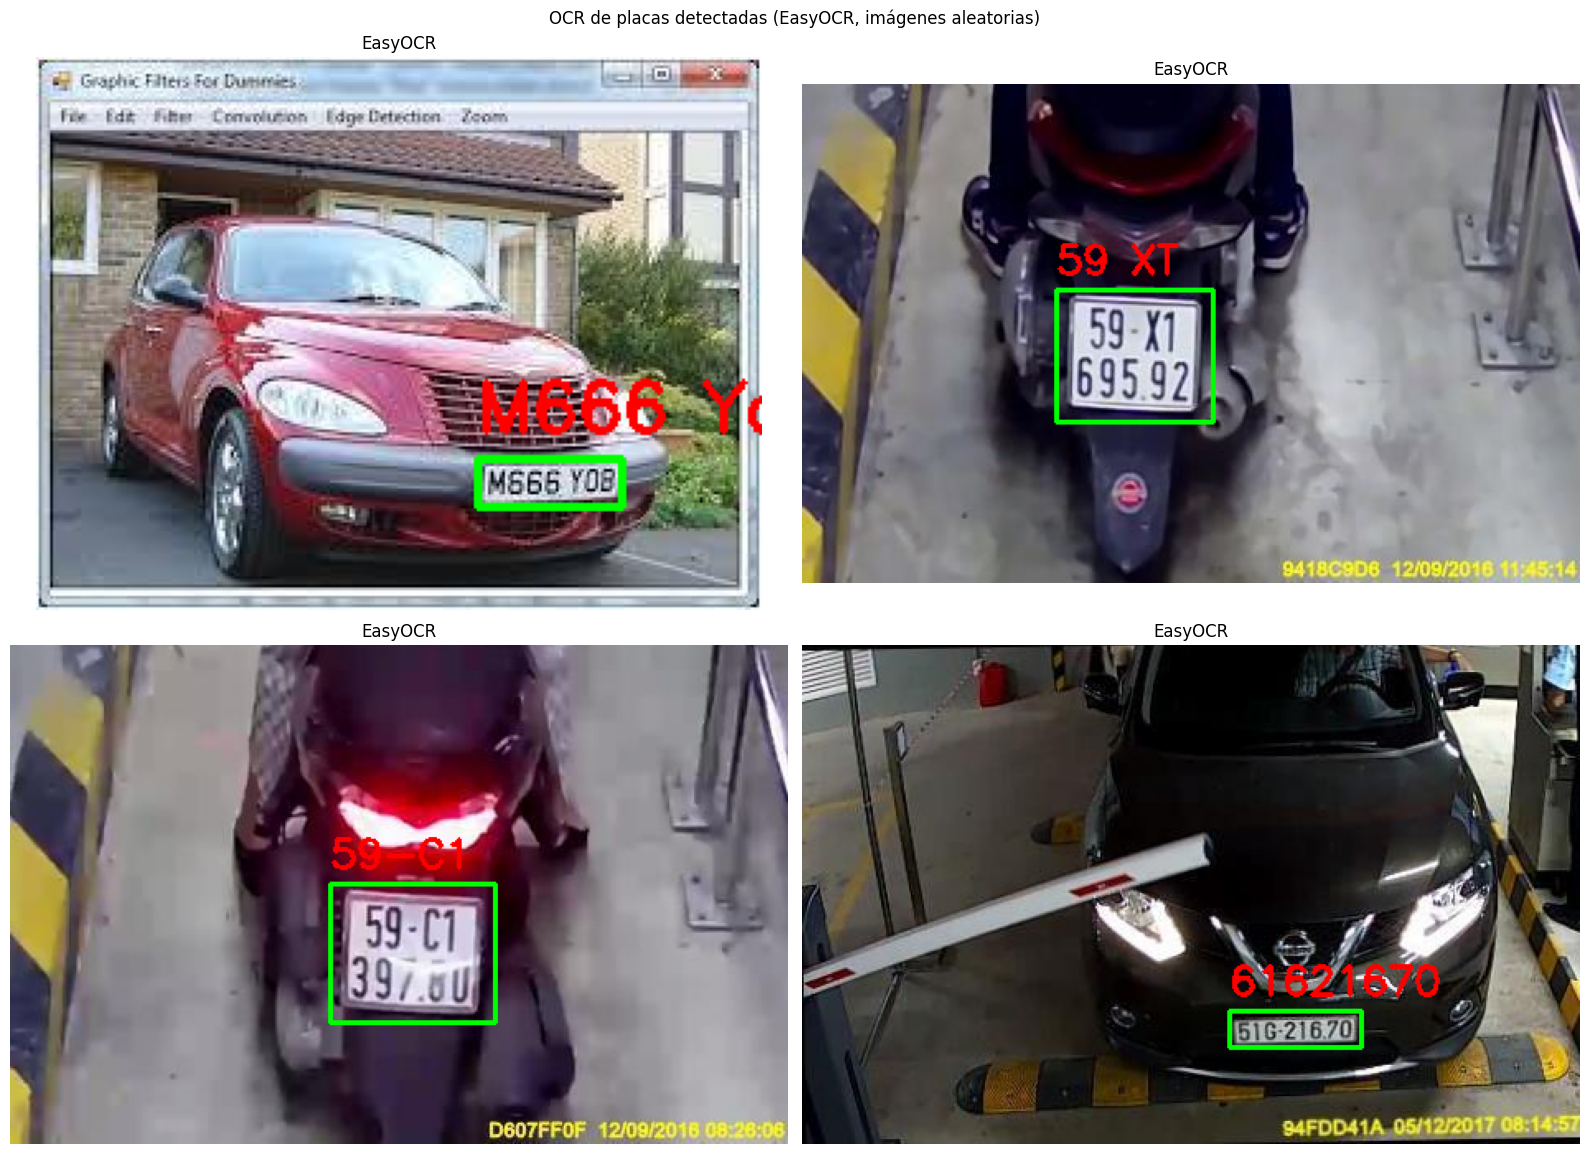

In [53]:
# EasyOCR
%pip install easyocr --quiet

import easyocr
from glob import glob
import cv2
import matplotlib.pyplot as plt
import random

reader = easyocr.Reader(['en', 'es'])  # Puedes agregar más idiomas si lo deseas

def ocr_easyocr_on_random_test(model, image_dir, n=4):
    images = glob(os.path.join(image_dir, "*.jpg")) + glob(os.path.join(image_dir, "*.png"))
    if len(images) == 0:
        print("No se encontraron imágenes en el directorio de test.")
        return
    random.shuffle(images)
    n = min(n, len(images))
    cols = 2
    rows = 2
    plt.figure(figsize=(8*cols, 6*rows))
    for i, img_path in enumerate(images[:n]):
        img = cv2.imread(img_path)
        results = model(img)
        boxes = results[0].boxes.xyxy.cpu().numpy().astype(int)
        img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
        for box in boxes:
            x1, y1, x2, y2 = box
            crop = img[y1:y2, x1:x2]
            ocr_result = reader.readtext(crop, detail=0, paragraph=False)
            text = ocr_result[0] if ocr_result else ''
            cv2.rectangle(img_rgb, (x1, y1), (x2, y2), (0,255,0), 2)
            cv2.putText(img_rgb, text.strip(), (x1, y1-10), cv2.FONT_HERSHEY_SIMPLEX, 0.8, (255,0,0), 2)
        plt.subplot(rows, cols, i+1)
        plt.imshow(img_rgb)
        plt.axis('off')
        plt.title("EasyOCR")
    plt.suptitle("OCR de placas detectadas (EasyOCR, imágenes aleatorias)")
    plt.tight_layout()
    plt.show()

ocr_easyocr_on_random_test(model, TEST_DIR)